# Clasificación de Rendimiento con Red Neuronal (TensorFlow)

## 1. Introducción

En este notebook construimos una red neuronal multicapa (MLP) para clasificación multiclase.

Utilizamos One-Hot Encoding para variables categóricas, normalización de variables numéricas, y entrenamiento con validación usando Keras (TensorFlow backend).

## 2. Preprocesamiento

### 2.1. Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import gdown

file_id = '1GxZjpmMXIHHWNvbp5_H7AeL1dQPvA4uY'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'train.csv', quiet=False)
df = pd.read_csv("train.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1GxZjpmMXIHHWNvbp5_H7AeL1dQPvA4uY
From (redirected): https://drive.google.com/uc?id=1GxZjpmMXIHHWNvbp5_H7AeL1dQPvA4uY&confirm=t&uuid=9e5f5846-e96c-4b32-b76a-58535448222a
To: /content/train.csv
100%|██████████| 144M/144M [00:02<00:00, 71.7MB/s]


In [ ]:
file_id_test = '1KrH-u4UU1e_Ha7cFuCZOB7ZT4tEUQ2ex'
gdown.download(f'https://drive.google.com/uc?id={file_id_test}', 'test.csv', quiet=False)
df_test = pd.read_csv("test.csv")

Downloading...
From: https://drive.google.com/uc?id=1KrH-u4UU1e_Ha7cFuCZOB7ZT4tEUQ2ex
To: /content/test.csv
100%|██████████| 59.2M/59.2M [00:00<00:00, 80.4MB/s]


### 2.2. Limpieza de datos (valores faltantes)

In [ ]:
if 'FAMI_TIENEINTERNET.1' in df.columns:
    df.drop(columns=['FAMI_TIENEINTERNET.1'], inplace=True)

missing_replacements = {
    'ESTU_VALORMATRICULAUNIVERSIDAD': 'Sin información',
    'ESTU_HORASSEMANATRABAJA': 'Sin información',
    'FAMI_ESTRATOVIVIENDA': 'Sin información',
    'FAMI_EDUCACIONPADRE': 'No sabe / No responde',
    'FAMI_EDUCACIONMADRE': 'No sabe / No responde',
    'FAMI_TIENECOMPUTADOR': 'Sin información',
    'FAMI_TIENEINTERNET': 'Sin información',
    'FAMI_TIENEAUTOMOVIL': 'Sin información'
}

for col, value in missing_replacements.items():
    df[col] = df[col].fillna(value)

mode_columns = ['FAMI_TIENELAVADORA', 'ESTU_PAGOMATRICULAPROPIO']
for col in mode_columns:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)

### 2.3. One-Hot Encoding de categorías

In [ ]:
y = df['RENDIMIENTO_GLOBAL']
df_features = df.drop(columns=['RENDIMIENTO_GLOBAL', 'ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4'])

X = pd.get_dummies(df_features, drop_first=True)

### 2.4. Normalización de variables numéricas

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy import sparse

X_sparse = sparse.csr_matrix(X.values)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_sparse)

### 2.5. División en conjuntos de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train_raw, y_val_raw = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train_raw))
y_val = to_categorical(le.transform(y_val_raw))

## 3. Modelo de Machine Learning

### 3.1. Arquitectura de la red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3.2. Compilación y entrenamiento

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.3889 - loss: 1.2821 - val_accuracy: 0.4309 - val_loss: 1.2062
Epoch 2/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.4281 - loss: 1.2123 - val_accuracy: 0.4342 - val_loss: 1.1972
Epoch 3/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.4319 - loss: 1.2029 - val_accuracy: 0.4381 - val_loss: 1.1933
Epoch 4/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.4355 - loss: 1.1981 - val_accuracy: 0.4388 - val_loss: 1.1929
Epoch 5/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.4375 - loss: 1.1955 - val_accuracy: 0.4396 - val_loss: 1.1885
Epoch 6/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.4390 - loss: 1.1915 - val_accuracy: 0.4401 - val_loss: 1.1884
Epoch 7/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4400 - loss: 1.1902 - val_accuracy: 0.4394 - val_loss: 1.1882
Epoch 8/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.4418 -

### 3.3. Evaluación y ajuste

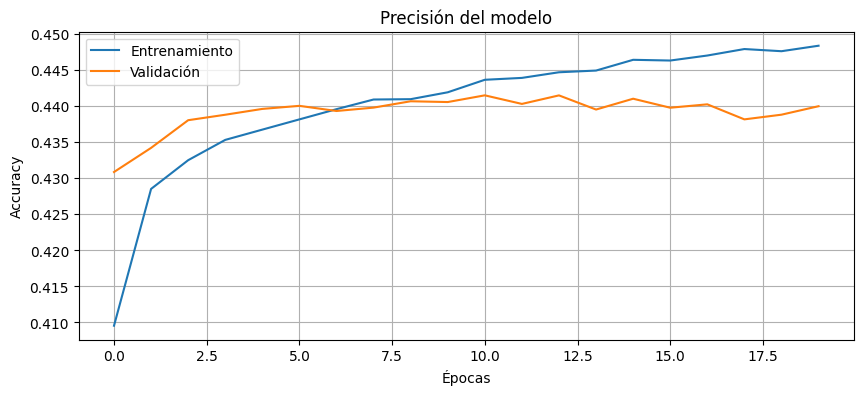

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 4. Predicción y Exportación

### 4.1. Aplicar mismo preprocesamiento al test.csv

In [ ]:
file_id_test = '1KrH-u4UU1e_Ha7cFuCZOB7ZT4tEUQ2ex'
gdown.download(f'https://drive.google.com/uc?id={file_id_test}', 'test.csv', quiet=False)
df_test = pd.read_csv("test.csv")

if 'FAMI_TIENEINTERNET.1' in df_test.columns:
    df_test.drop(columns=['FAMI_TIENEINTERNET.1'], inplace=True)

for col, value in missing_replacements.items():
    df_test[col] = df_test[col].fillna(value)
for col in mode_columns:
    if col in df_test.columns:
        moda = df[col].mode()[0]  # usamos moda del train
        df_test[col] = df_test[col].fillna(moda)

X_kaggle = pd.get_dummies(df_test.drop(columns=['ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']), drop_first=True)
X_kaggle = X_kaggle.reindex(columns=X.columns, fill_value=0)
X_kaggle_scaled = scaler.transform(X_kaggle)

Downloading...
From: https://drive.google.com/uc?id=1KrH-u4UU1e_Ha7cFuCZOB7ZT4tEUQ2ex
To: /content/test.csv
100%|██████████| 59.2M/59.2M [00:00<00:00, 113MB/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### 4.2. Realizar predicciones

In [ ]:
y_pred = model.predict(X_kaggle_scaled)
y_pred_labels = le.inverse_transform(np.argmax(y_pred, axis=1))

9275/9275 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


In [ ]:
y_pred

array([[0.1305939 , 0.34654328, 0.23963638, 0.28322637],
       [0.13999014, 0.26049626, 0.27600256, 0.32351103],
       [0.5233324 , 0.04069159, 0.2940874 , 0.14188872],
       ...,
       [0.30653954, 0.11268777, 0.35124654, 0.22952603],
       [0.6942382 , 0.02547994, 0.21261509, 0.06766672],
       [0.6124225 , 0.0198027 , 0.27913794, 0.08863685]], dtype=float32)

In [ ]:
y_pred_labels

array(['bajo', 'medio-bajo', 'alto', ..., 'medio-alto', 'alto', 'alto'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculamos el accuracy en el conjunto de validación
y_val_pred_nn = np.argmax(model.predict(X_val), axis=1)
y_val_true_nn = np.argmax(y_val, axis=1)
accuracy_nn = accuracy_score(y_val_true_nn, y_val_pred_nn)
print(f"🎯 Accuracy - Redes Neuronales: {accuracy_nn:.4f}")

4329/4329 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
🎯 Accuracy - Redes Neuronales: 0.4400


### 4.3. Visualización

🎯 Distribución de clases predichas (Redes Neuronales):
0    36740
1    35593
2    35112
3    31055
Name: count, dtype: int64


/tmp/ipython-input-16-1859347369.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts_nn.index, y=pred_counts_nn.values, palette="magma")


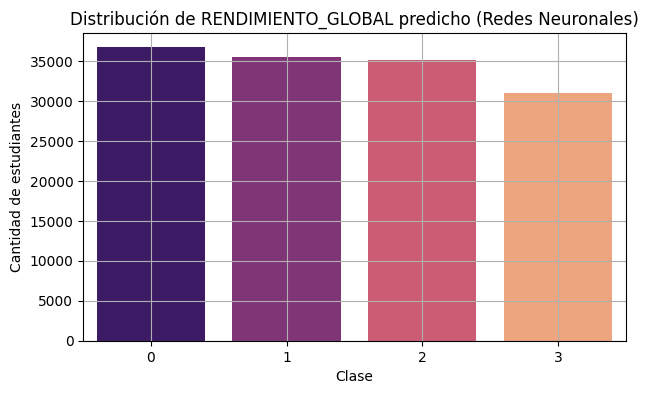

<Figure size 700x600 with 0 Axes>

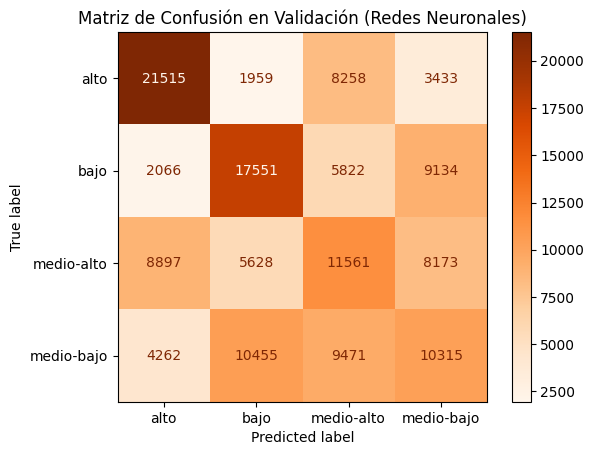

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tabla de distribución de clases predichas
pred_counts_nn = pd.Series(y_val_pred_nn).value_counts().sort_index()
print("🎯 Distribución de clases predichas (Redes Neuronales):")
print(pred_counts_nn)

# Gráfico de barras
plt.figure(figsize=(7, 4))
sns.barplot(x=pred_counts_nn.index, y=pred_counts_nn.values, palette="magma")
plt.title("Distribución de RENDIMIENTO_GLOBAL predicho (Redes Neuronales)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de estudiantes")
plt.grid(True)
plt.show()

# Matriz de confusión
cm_nn = confusion_matrix(y_val_true_nn, y_val_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=le.classes_)
plt.figure(figsize=(7, 6))
disp_nn.plot(cmap="Oranges", values_format='d')
plt.title("Matriz de Confusión en Validación (Redes Neuronales)")
plt.grid(False)
plt.show()

### 4.4. Envío a Kaggle

In [ ]:
# Generar el archivo de submission
submission_nn = pd.DataFrame({
    'ID': df_test['ID'],
    'RENDIMIENTO_GLOBAL': le.inverse_transform(np.argmax(y_pred, axis=1))
})
submission_nn.to_csv('solution.csv', index=False)
print("🎯 Redes Neuronales: archivo 'solution.csv' generado")

🎯 Redes Neuronales: archivo 'solution.csv' generado


## 5. Conclusiones

- El modelo elegido como solución final fue la red neuronal profunda, logrando un buen resultado en Kaggle con un accuracy de 0.43930.
- Este modelo demostró una excelente capacidad para generalizar en datos complejos y de gran tamaño.
- Su arquitectura flexible, junto con técnicas de regularización y escalado adecuadas, le permitió sobresalir frente a modelos clásicos.
- Aunque requiere más tiempo de entrenamiento y cuidados en el preprocesamiento, se confirmó como la mejor opción para esta tarea de clasificación multiclase que pudimos hallar.